#### Example: Calculation of the Compressibility of Methane using van der Waals, Peng-Robinson and the Lee-Kesler equations of state

We downloaded PVT data for Methane from NIST at T$_{r}\approx{1.1}$ and compared the compressibility factor calculated from the data with that calculated using various cubic equations of state, or the Lee-Kesler (LK) equation of state (following the calculation algorithm).

In [8]:
# include -
# this calculation requires:
# using Thermodynamics - install (in pkg mode): add https://github.com/varnerlab/Thermodynamics.jl
# using DataFrames 
# using CSV
# using PyPlot
# using TOML - to install (in pkg mode): add https://github.com/JuliaLang/TOML.jl
include("./code/Include.jl");

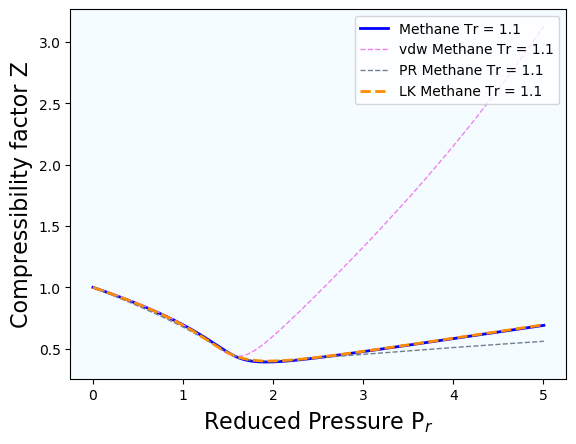

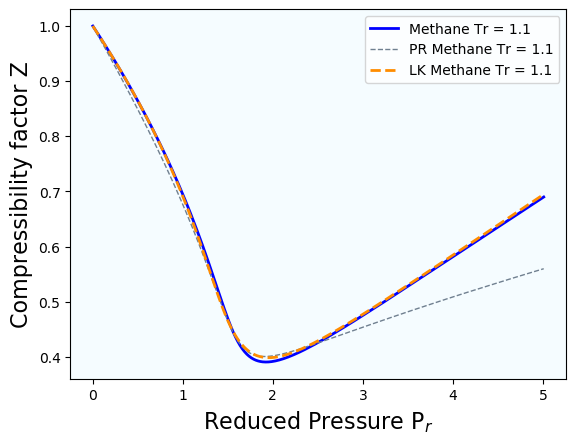

In [20]:
# setup =
path_to_data_file = "./Methane-NIST-210K.txt"
path_to_properties_file = "./Properties.toml"

# go - this returns:
# ZD - Z calculated from the data
# ZM - Z calculated from models (c1: vdw, c2: PR and c3: LK)
# pd - properties dictionary
# df - experimental data (data frame)
(ZD,ZM,pd,df) = compute_compressibility(path_to_data_file, path_to_properties_file)

# setup plot -
Pc = pd["methane"]["critical_pressure"]
Pcol = Symbol("Pressure (MPa)")
P = df[!,Pcol]
Pr = P./Pc

# make plot -
figure()
plot(Pr,ZD,"b",lw=2, label="Methane Tr = 1.1")
plot(Pr,ZM[:,1],"--",lw=1,color="violet",label="vdw Methane Tr = 1.1")
plot(Pr,ZM[:,2],"--",lw=1,color="slategray",label="PR Methane Tr = 1.1")
plot(Pr,ZM[:,3],"--",lw=2,color="darkorange",label="LK Methane Tr = 1.1")
legend(loc="upper right");

# set the face color -
fig = gcf()
ax = gca()
ax.set_facecolor("#F5FCFF")
fig.set_facecolor("#F5FCFF")
# ax.spines["top"].set_visible(false)
# ax.spines["right"].set_visible(false)

xlabel(L"Reduced Pressure P$_{r}$",fontsize=16)
ylabel("Compressibility factor Z",fontsize=16)

figure()
plot(Pr,ZD,"b",lw=2, label="Methane Tr = 1.1")
plot(Pr,ZM[:,2],"--",lw=1,color="slategray",label="PR Methane Tr = 1.1")
plot(Pr,ZM[:,3],"--",lw=2,color="darkorange",label="LK Methane Tr = 1.1")
legend(loc="upper right");

# set the face color -
fig = gcf()
ax = gca()
ax.set_facecolor("#F5FCFF")
fig.set_facecolor("#F5FCFF")

xlabel(L"Reduced Pressure P$_{r}$",fontsize=16);
ylabel("Compressibility factor Z",fontsize=16);